In [1]:
# !pip install interpret
# !pip install --user xgboost
# !pip install pytorch-tabnet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from interpret import preserve, show
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
dataset_folder = 'dataset/HGSORF_CSection/'

In [4]:
df=pd.read_csv(dataset_folder + 'train_COMBO.csv')
df.replace(to_replace=' ',value=np.nan,inplace=True)
#df.drop(columns=['Unnamed: 0'],inplace=True)
df1=pd.read_csv(dataset_folder + 'test_COMBO.csv')
df1.replace(to_replace=' ',value=np.nan,inplace=True)
#df1.drop(columns=['Unnamed: 0'],inplace=True)
x_train=df.drop(columns=['Last_Birth_a_Caesarean_Section'])
y_train=df['Last_Birth_a_Caesarean_Section']
x_test=df1.drop(columns=['Last_Birth_a_Caesarean_Section'])
y_test=df1['Last_Birth_a_Caesarean_Section']

In [5]:
df_main=pd.concat([df,df1],axis=0)
df_main

Age_of_Mother  Type_of_place_of_residence  Mothers_Education  \
0                27                           1                  1   
1                32                           2                  0   
2                37                           1                  2   
3                29                           2                  1   
4                31                           2                  0   
...             ...                         ...                ...   
7881             27                           2                  0   
7882             21                           1                  2   
7883             35                           2                  0   
7884             24                           1                  1   
7885             27                           1                  1   

      Number_of_household_members_  Total_children_ever_born  \
0                               10                         2   
1                                8                         6   
2                                7                         5   
3                               14                         6   
4                                5                         3   
...                            ...                       ...   
7881                            24                         6   
7882                             4                         1   
7883                             8                         7   
7884                            17                         1   
7885                            12                         8   

      Births_in_last_five_years  Number_of_living_children  \
0                             2                          2   
1                             2                          4   
2                             1                          5   
3                             2                          3   
4                             3                          3   
...                         ...                        ...   
7881                          2                          5   
7882                          1                          1   
7883                          1                          6   
7884                          1                          1   
7885                          2                          8   

      Ever_had_a_terminated_pregnancy  Sources_of_Drinking_Water  \
0                                   1                          0   
1                                   0                          1   
2                                   0                          1   
3                                   0                          1   
4                                   0                          0   
...                               ...                        ...   
7881                                0                          0   
7882                                0                          1   
7883                                0                          1   
7884                                0                          1   
7885                                1                          1   

      Household_Toilet_Facility  ...  Smoker  Husbands_Education  \
0                             0  ...       0                   2   
1                             0  ...       0                   1   
2                             1  ...       0                   2   
3                             1  ...       0                   0   
4                             0  ...       0                   2   
...                         ...  ...     ...                 ...   
7881                          1  ...       0                   2   
7882                          1  ...       0                   2   
7883                          0  ...       0                   2   
7884                          1  ...       0                   2   
7885                          1  ...       0                   2   

      Husbands_Oc

In [6]:
x=df_main.drop(columns=['Last_Birth_a_Caesarean_Section'])
y=df_main['Last_Birth_a_Caesarean_Section']

In [7]:
df

Age_of_Mother  Type_of_place_of_residence  Mothers_Education  \
0                 27                           1                  1   
1                 32                           2                  0   
2                 37                           1                  2   
3                 29                           2                  1   
4                 31                           2                  0   
...              ...                         ...                ...   
18393             30                           1                  3   
18394             30                           2                  0   
18395             24                           1                  2   
18396             23                           2                  0   
18397             28                           2                  0   

       Number_of_household_members_  Total_children_ever_born  \
0                                10                         2   
1                                 8                         6   
2                                 7                         5   
3                                14                         6   
4                                 5                         3   
...                             ...                       ...   
18393                             5                         4   
18394                             8                         4   
18395                            11                         2   
18396                            13                         4   
18397                             8                         4   

       Births_in_last_five_years  Number_of_living_children  \
0                              2                          2   
1                              2                          4   
2                              1                          5   
3                              2                          3   
4                              3                          3   
...                          ...                        ...   
18393                          2                          4   
18394                          2                          4   
18395                          2                          2   
18396                          3                          3   
18397                          1                          4   

       Ever_had_a_terminated_pregnancy  Sources_of_Drinking_Water  \
0                                    1                          0   
1                                    0                          1   
2                                    0                          1   
3                                    0                          1   
4                                    0                          0   
...                                ...                        ...   
18393                                1                          1   
18394                                0                          1   
18395                                0                          1   
18396                                0                          1   
18397                                1                          1   

       Household_Toilet_Facility  ...  Smoker  Husbands_Education  \
0                              0  ...       0                   2   
1                              0  ...       0                   1   
2                              1  ...       0                   2   
3                              1  ...       0                   0   
4                              0  ...       0                   2   
...                          ...  ...     ...                 ...   
18393                          1  ...       0                   3   
18394                          1  ...       0                   0   
18395                          1  ...       0                   3   
18396                          0  ...       0                   0   
18397                       

In [8]:
df1

Age_of_Mother  Type_of_place_of_residence  Mothers_Education  \
0                32                           1                  2   
1                28                           1                  0   
2                24                           2                  0   
3                33                           1                  0   
4                24                           2                  1   
...             ...                         ...                ...   
7881             27                           2                  0   
7882             21                           1                  2   
7883             35                           2                  0   
7884             24                           1                  1   
7885             27                           1                  1   

      Number_of_household_members_  Total_children_ever_born  \
0                               14                         3   
1                               18                         6   
2                                4                         3   
3                               24                         5   
4                               10                         2   
...                            ...                       ...   
7881                            24                         6   
7882                             4                         1   
7883                             8                         7   
7884                            17                         1   
7885                            12                         8   

      Births_in_last_five_years  Number_of_living_children  \
0                             2                          3   
1                             2                          6   
2                             2                          2   
3                             1                          5   
4                             1                          2   
...                         ...                        ...   
7881                          2                          5   
7882                          1                          1   
7883                          1                          6   
7884                          1                          1   
7885                          2                          8   

      Ever_had_a_terminated_pregnancy  Sources_of_Drinking_Water  \
0                                   0                          0   
1                                   0                          1   
2                                   0                          1   
3                                   0                          1   
4                                   0                          1   
...                               ...                        ...   
7881                                0                          0   
7882                                0                          1   
7883                                0                          1   
7884                                0                          1   
7885                                1                          1   

      Household_Toilet_Facility  ...  Smoker  Husbands_Education  \
0                             0  ...       0                   2   
1                             1  ...       0                   1   
2                             1  ...       0                   2   
3                             1  ...       0                   2   
4                             1  ...       0                   0   
...                         ...  ...     ...                 ...   
7881                          1  ...       0                   2   
7882                          1  ...       0                   2   
7883                          0  ...       0                   2   
7884                          1  ...       0                   2   
7885                          1  ...       0                   2   

      Husbands_Oc

In [9]:
x_test.shape

(7886, 24)

# EDA

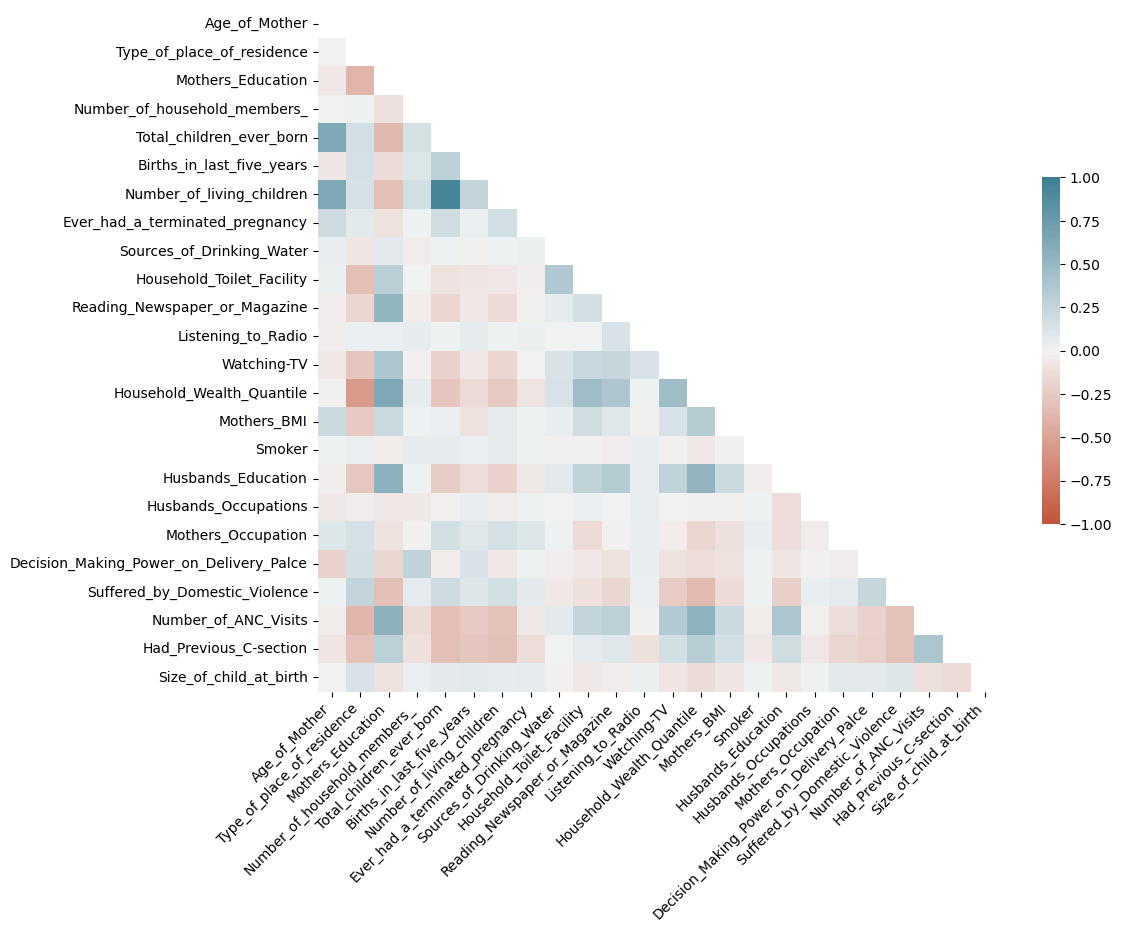

In [10]:
data = x_train
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(
    corr, mask=mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,  cbar_kws={"shrink": .5}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age_of_Mother                            18398 non-null  int64  
 1   Type_of_place_of_residence               18398 non-null  int64  
 2   Mothers_Education                        18398 non-null  int64  
 3   Number_of_household_members_             18398 non-null  int64  
 4   Total_children_ever_born                 18398 non-null  int64  
 5   Births_in_last_five_years                18398 non-null  int64  
 6   Number_of_living_children                18398 non-null  int64  
 7   Ever_had_a_terminated_pregnancy          18398 non-null  int64  
 8   Sources_of_Drinking_Water                18398 non-null  int64  
 9   Household_Toilet_Facility                18398 non-null  int64  
 10  Reading_Newspaper_or_Magazine            18398

# ML Model

In [12]:
import sklearn.metrics
import pandas as pd
import time
import numpy as np

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from interpret.glassbox import ExplainableBoostingClassifier
from pytorch_tabnet.tab_model import TabNetClassifier

In [14]:
random_state=42

In [15]:
x_train

Age_of_Mother  Type_of_place_of_residence  Mothers_Education  \
0                 27                           1                  1   
1                 32                           2                  0   
2                 37                           1                  2   
3                 29                           2                  1   
4                 31                           2                  0   
...              ...                         ...                ...   
18393             30                           1                  3   
18394             30                           2                  0   
18395             24                           1                  2   
18396             23                           2                  0   
18397             28                           2                  0   

       Number_of_household_members_  Total_children_ever_born  \
0                                10                         2   
1                                 8                         6   
2                                 7                         5   
3                                14                         6   
4                                 5                         3   
...                             ...                       ...   
18393                             5                         4   
18394                             8                         4   
18395                            11                         2   
18396                            13                         4   
18397                             8                         4   

       Births_in_last_five_years  Number_of_living_children  \
0                              2                          2   
1                              2                          4   
2                              1                          5   
3                              2                          3   
4                              3                          3   
...                          ...                        ...   
18393                          2                          4   
18394                          2                          4   
18395                          2                          2   
18396                          3                          3   
18397                          1                          4   

       Ever_had_a_terminated_pregnancy  Sources_of_Drinking_Water  \
0                                    1                          0   
1                                    0                          1   
2                                    0                          1   
3                                    0                          1   
4                                    0                          0   
...                                ...                        ...   
18393                                1                          1   
18394                                0                          1   
18395                                0                          1   
18396                                0                          1   
18397                                1                          1   

       Household_Toilet_Facility  ...  Mothers_BMI  Smoker  \
0                              0  ...    27.650000       0   
1                              0  ...    25.450000       0   
2                              1  ...    31.023793       0   
3                              1  ...    20.548000       0   
4                              0  ...    23.000000       0   
...                          ...  ...          ...     ...   
18393                          1  ...    29.116000       0   
18394                          1  ...    22.678000       0   
18395                          1  ...    23.626742       0   
18396                          0  ...    22.150000       0   
18397                          1  ...    23.520000       0   

       Husbands_Education  Husbands_Occupa

In [16]:
def classify_report(clfs, dataset):
    x_train, y_train, x_test, y_test = dataset
    data = []
    for clf, name, no_df in clfs:
        if no_df:
            x_tr, x_te = x_train, x_test
        else:
            x_tr, x_te = x_train.values,  x_test.values
        clf.fit(x_tr, y_train)
        pred = clf.predict(x_te)
        f1, acc = sklearn.metrics.f1_score(y_test, pred, average='binary'), sklearn.metrics.accuracy_score(y_test, pred)
        data.append([name, f1, acc])
    df = pd.DataFrame(data, columns = ['Name', 'F1', 'Acc.'])
    df = df.sort_values(by=['F1'])
    return df

In [17]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=random_state)
gbc = GradientBoostingClassifier(random_state=random_state)
_xgb = xgb.XGBClassifier(random_state=random_state)
ebm = ExplainableBoostingClassifier(random_state=random_state)
tbn = TabNetClassifier(verbose=0, seed=random_state)

clfs = [(rf, 'rf', True), (gbc, 'gbc', True), (_xgb, 'xgb', True), (ebm, 'ebm', True), (tbn, 'tbn', False)]
# clfs = [(rf, 'rf', True), (ebm, 'ebm', True), (tbn, 'tbn', False)]
dataset = x_train, y_train, x_test, y_test
classify_report(clfs, dataset)

Name        F1      Acc.
1  gbc  0.927626  0.932031
4  tbn  0.950952  0.950672
3  ebm  0.953862  0.954857
2  xgb  0.981586  0.981740
0   rf  0.984698  0.984910

# XAI

In [18]:
import time, datetime
from joblib import Parallel, delayed
import itertools

n_jobs = 4

In [19]:
class_names = ['NO','YES']
feature_names = x_train.columns.to_list()
# local = lime, shap, anchor, tabnet, ebm
# global = pfi, tabnet, ebm, shap
# methods = pfi, tabnet, ebm, shap, lime, anchor
# remaining = pdp, eli5, ice, adawhip, break down

## Local

### LIME

In [20]:
import lime
from lime import lime_tabular

In [21]:
exp_lime=lime_tabular.LimeTabularExplainer(np.array(x_train),feature_names=x_train.columns,class_names=['NO','YES'],mode='classification')

In [22]:

def lime_explain_instance_step(i, lim):
    warnings.filterwarnings("ignore")
    out = []
    for k in range(i, lim):
        e = exp_lime.explain_instance(x_test.values[k], rf.predict_proba)
        out.append(e)
    return out

# lime_explanations_list = [exp_lime.explain_instance(x_test.values[i], rf.predict_proba) for i in range(len(x_test))]  # sequential and slower
total = len(x_test)
out = Parallel(n_jobs=n_jobs)(delayed(lime_explain_instance_step)(i, min(total, i+int(total/n_jobs))) for i in range(0, total, int(total/n_jobs)))
lime_explanations_list = list(itertools.chain(*out))


In [23]:
display(x_test.iloc[554:556])
display(y_test.iloc[554:556])

Age_of_Mother  Type_of_place_of_residence  Mothers_Education  \
554             22                           2                  0   
555             40                           2                  0   

     Number_of_household_members_  Total_children_ever_born  \
554                             8                         1   
555                             8                         7   

     Births_in_last_five_years  Number_of_living_children  \
554                          1                          1   
555                          1                          7   

     Ever_had_a_terminated_pregnancy  Sources_of_Drinking_Water  \
554                                0                          1   
555                                0                          1   

     Household_Toilet_Facility  ...  Mothers_BMI  Smoker  Husbands_Education  \
554                          1  ...    17.744991       0                   0   
555                          0  ...    19.890000       0                   0   

     Husbands_Occupations  Mothers_Occupation  \
554                     4                   0   
555                     1                   1   

     Decision_Making_Power_on_Delivery_Palce  Suffered_by_Domestic_Violence  \
554                                        2                              1   
555                                        2                              0   

     Number_of_ANC_Visits  Had_Previous_C-section  Size_of_child_at_birth  
554                     3                       1                       3  
555                     0                       0                       3  

[2 rows x 24 columns]

554    1
555    0
Name: Last_Birth_a_Caesarean_Section, dtype: int64

In [24]:
id_to_explain = 554
lime_explanations_list[id_to_explain].show_in_notebook(show_table=True)

In [25]:
id_to_explain = 555
lime_explanations_list[id_to_explain].show_in_notebook(show_table=True)

### SHAP

In [26]:
import shap
shap.plots.initjs()

In [27]:
exp_shap = shap.TreeExplainer(rf)
shap_values = exp_shap.shap_values(x_test)

In [28]:
shap.force_plot(exp_shap.expected_value[0], shap_values[id_to_explain][:,0], x_test.iloc[id_to_explain])

In [29]:
exp_shap_values = exp_shap(x_test)

In [30]:
print(exp_shap.expected_value[0] + sum(shap_values[554][:, 0]))
print(rf.predict_proba(x_test)[554, 0])

0.009999999999999565
0.01


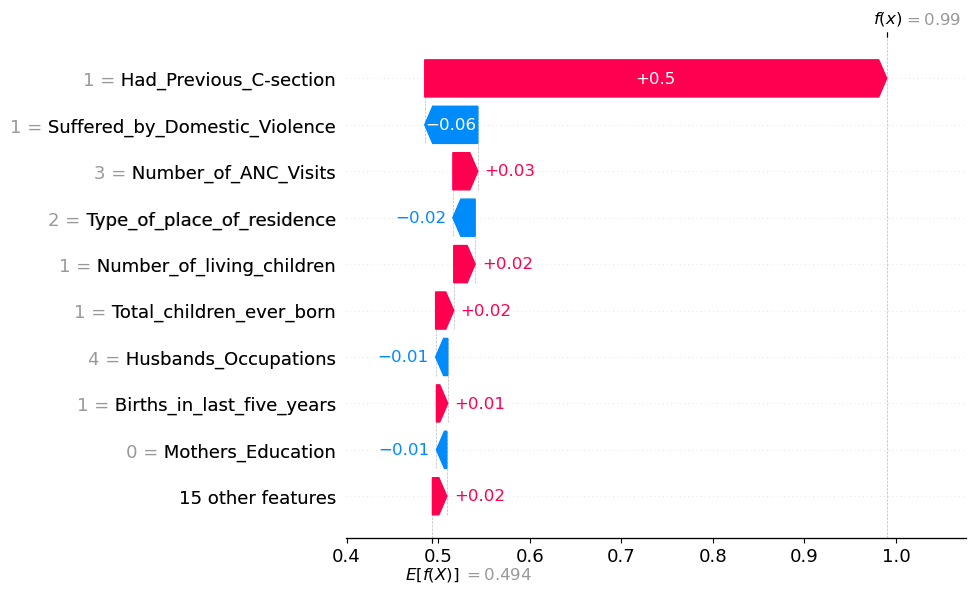

In [31]:
id_to_explain = 554
output_to_explain = 1
shap.plots.waterfall(exp_shap_values[id_to_explain,:,output_to_explain], max_display=10)

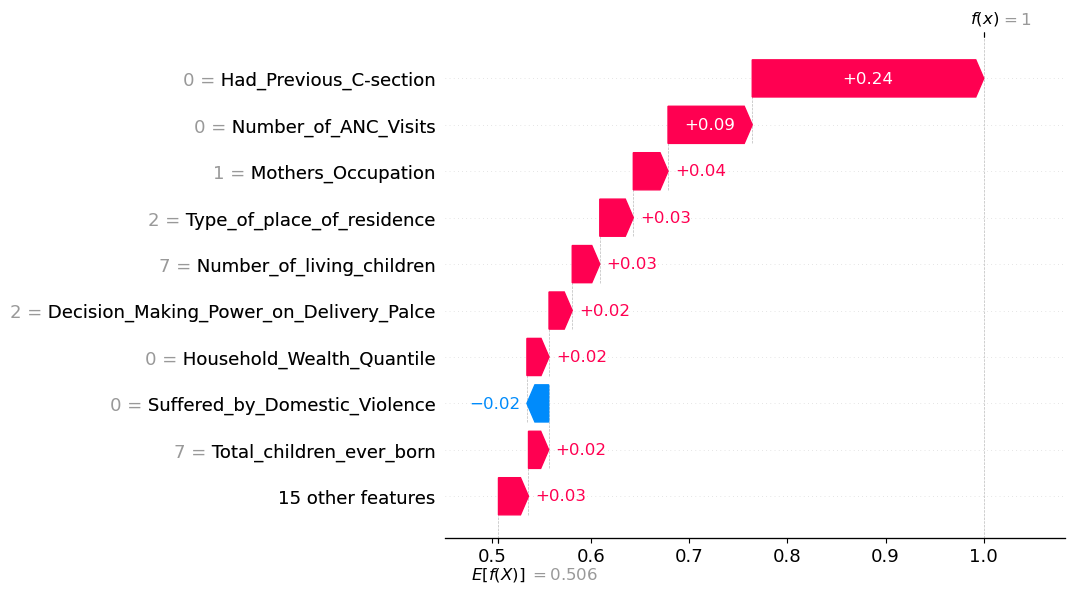

In [32]:
id_to_explain = 555
output_to_explain = 0
shap.plots.waterfall(exp_shap_values[id_to_explain,:,output_to_explain], max_display=10)

#### Fidelity

In [33]:
selected_model_predict_proba_array = rf.predict_proba(x_test)
selected_model_predict_array = rf.predict(x_test)

In [34]:
id_to_test = 3
print('LIME', selected_model_predict_proba_array[id_to_test, 1], lime_explanations_list[id_to_test].local_pred[0])
print(int(lime_explanations_list[id_to_test].local_pred[0]>0.5))
print('SHAP', selected_model_predict_proba_array[id_to_test, 1], exp_shap.expected_value[1] + np.sum(shap_values[id_to_test][:, 1]))
print(int(exp_shap.expected_value[1] + np.sum(shap_values[id_to_test][:, 1])>0.5))
del id_to_test

LIME 0.03 0.13145217780334972
0
SHAP 0.03 0.030000000000000193
0


In [39]:
lime_fidelity = np.mean([1-np.abs(selected_model_predict_proba_array[i, 1] - (lime_explanations_list[i].local_pred[0])) for i in range(len(x_test))])
print(f'LIME Fidelity: {lime_fidelity:.4f}')

# For SHAP, fidelity is usually high as it's designed to be an accurate representation of the model
shap_fidelity = np.mean([1-np.abs(selected_model_predict_proba_array[i, 1] - (exp_shap.expected_value[1] + np.sum(shap_values[i][:, 1]))) for i in range(len(x_test))])
print(f'SHAP Fidelity: {shap_fidelity:.4f}')

LIME Fidelity: 0.8897
SHAP Fidelity: 1.0000


In [36]:
# accuracy_score(selected_model.predict(X_test), np.argmax(shap_values, axis=1))
from sklearn.metrics import accuracy_score

lime_predict_array = np.array([int(lime_explanations_list[i].local_pred[0]>0.5) for i in range(len(x_test))])
shap_predict_array = np.array([int(exp_shap.expected_value[1] + np.sum(shap_values[i][:, 1])>0.5) for i in range(len(x_test))])

print(f'LIME Fidelity (Predict): {accuracy_score(selected_model_predict_array, lime_predict_array):.4f}')
print(f'SHAP Fidelity (Predict): {accuracy_score(selected_model_predict_array, shap_predict_array):.4f}')

LIME Fidelity (Predict): 0.9323
SHAP Fidelity (Predict): 0.9997


In [37]:
differing_indices = np.where(selected_model_predict_array != shap_predict_array)[0]
differing_indices

array([2413, 5617])

In [38]:
for id_to_test in differing_indices:
    print('LIME', selected_model_predict_proba_array[id_to_test, 1], lime_explanations_list[id_to_test].local_pred[0])
    print(int(lime_explanations_list[id_to_test].local_pred[0]>0.5))
    print('SHAP', selected_model_predict_proba_array[id_to_test, 1], exp_shap.expected_value[1] + np.sum(shap_values[id_to_test][:, 1]))
    print(int(exp_shap.expected_value[1] + np.sum(shap_values[id_to_test][:, 1])>0.5))

LIME 0.5 0.2442899108586376
0
SHAP 0.5 0.5000000000001036
1
LIME 0.5 0.25787625047793256
0
SHAP 0.5 0.5000000000000058
1


In [34]:
# lime_fidelity = np.mean([np.abs(selected_model_predict_proba_array[i, 0] - (lime_explanations_list[i].local_pred[0])) for i in range(len(x_test))])
# print(f'LIME Fidelity: {lime_fidelity:.2f}')

# # For SHAP, fidelity is usually high as it's designed to be an accurate representation of the model
# shap_fidelity = np.mean([np.abs(selected_model_predict_proba_array[i, 1] - (exp_shap.expected_value[0] + np.sum(shap_values[i][:, 0]))) for i in range(len(x_test))])
# print(f'SHAP Fidelity: {shap_fidelity:.2f}')

LIME Fidelity: 0.79
SHAP Fidelity: 0.88


In [35]:
# # accuracy_score(rf.predict(X_test), np.argmax(shap_values, axis=1))
# from sklearn.metrics import accuracy_score

# lime_predict_array = np.array([1 if lime_explanations_list[i].local_pred[0]>0.5 else 0 for i in range(len(x_test))])
# shap_predict_array = np.array([0 if exp_shap.expected_value[0] + np.sum(shap_values[i][:, 0])>exp_shap.expected_value[0] + np.sum(shap_values[i][:, 1]) else 1 for i in range(len(x_test))])

# print(f'LIME Fidelity (Predict): {accuracy_score(selected_model_predict_array, lime_predict_array):.4f}')
# print(f'SHAP Fidelity (Predict): {accuracy_score(selected_model_predict_array, shap_predict_array):.4f}')

LIME Fidelity (Predict): 0.9323
SHAP Fidelity (Predict): 0.9995


### EBM

In [36]:
ebm_local = ebm.explain_local(x_test, y_test, name='EBM')

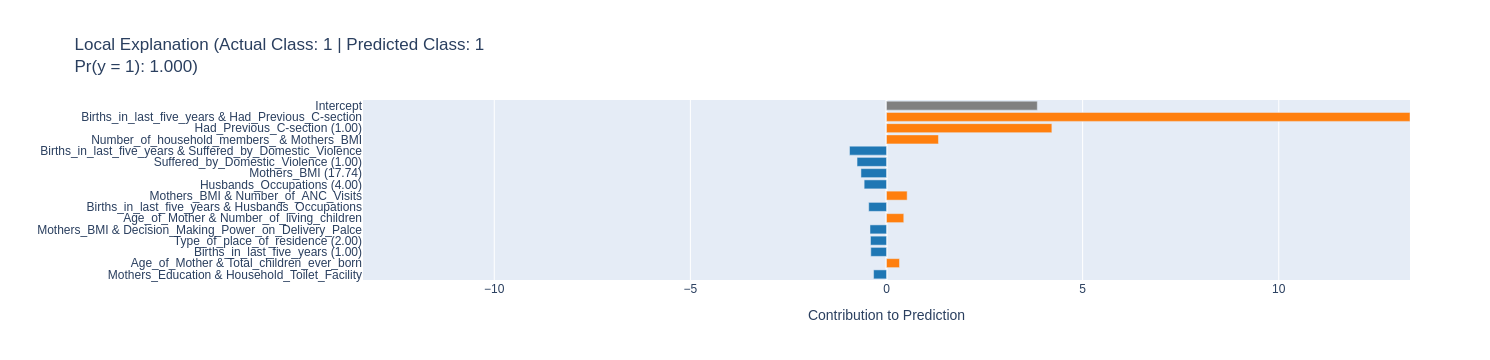

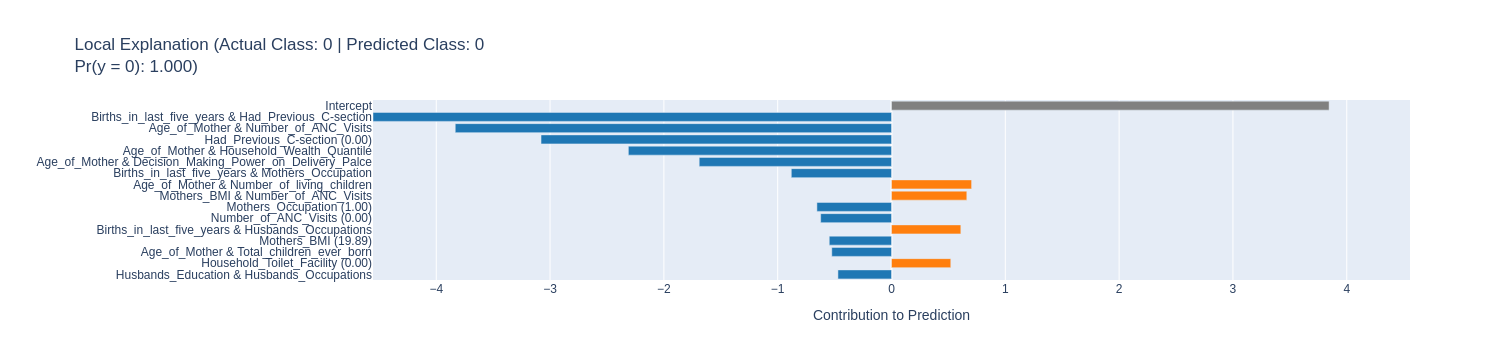

In [37]:
# show(ebm.explain_local(x_test[554:555+1], y_test[554:555+1]), 0)
preserve(ebm_local, 554)
preserve(ebm_local, 555)

### TABNET

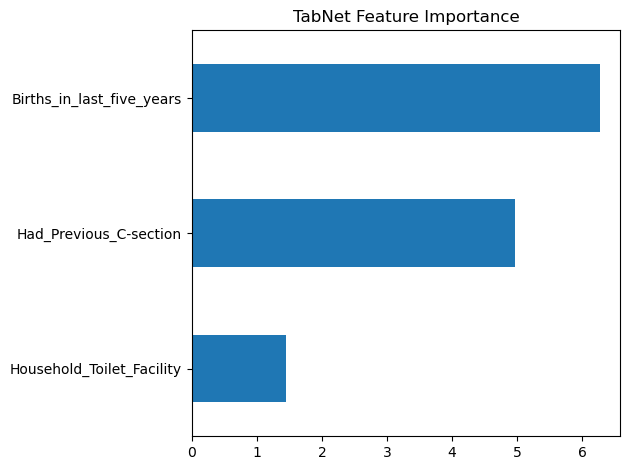

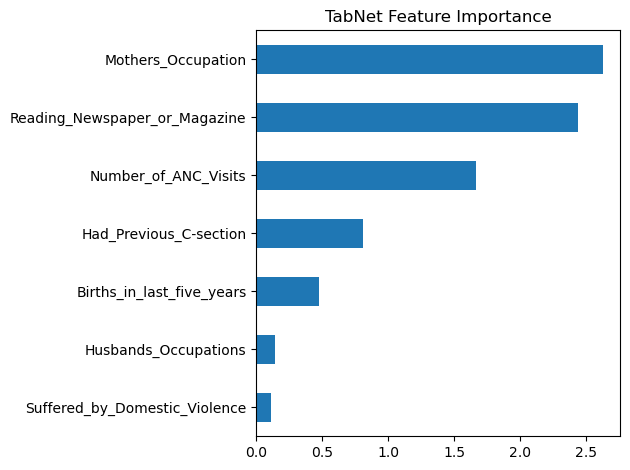

In [38]:
explain_tabnet_matrix, tabnet_masks = tbn.explain(x_test.values)

def get_tbn_local_graph(idx, feature_names):
    m = explain_tabnet_matrix[idx]>0
    ax = pd.Series(explain_tabnet_matrix[idx][m], index=np.array(feature_names)[m]).sort_values(ascending=True).plot.barh()
    ax.set_title("TabNet Feature Importance")
    ax.figure.tight_layout()
    plt.show()

get_tbn_local_graph(554, feature_names)
get_tbn_local_graph(555, feature_names)

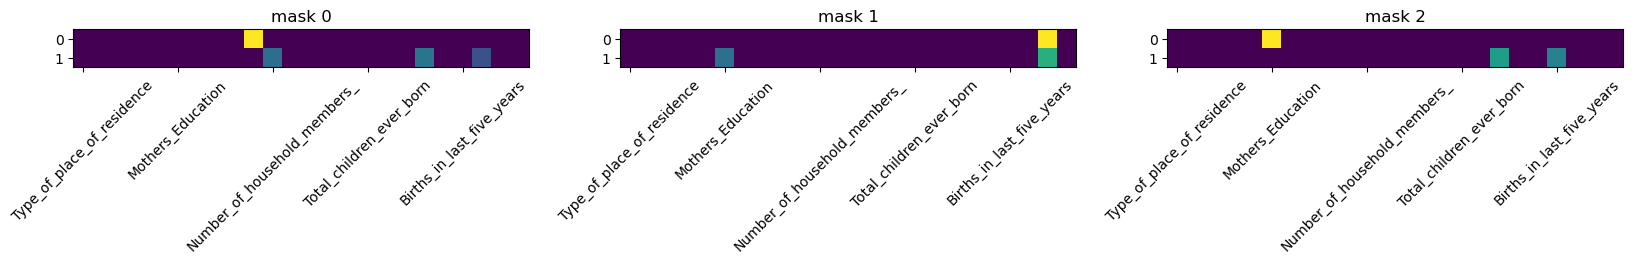

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))


for i in range(3):
    axs[i].imshow(tabnet_masks[i][554:556])
    axs[i].set_title(f"mask {i}")
    axs[i].set_xticklabels(labels = feature_names, rotation=45)

#### Simplicity

In [40]:
# https://link.springer.com/chapter/10.1007/978-3-031-20319-0_30
# Simplicity is the ability to choose only the necessary and sufficient features for explaining the prediction.

# Calculate simplicity
def calculate_simplicity(_values, threshold=0.05):
    simplicity_scores = []
    for instance_value in _values:
        abs_values = np.abs(instance_value)
        num_important_features = np.sum( abs_values > (max(abs_values) *threshold))
        simplicity_scores.append(num_important_features)
    return np.mean(simplicity_scores)


def get_simplicity_dict(name, values, threshold_list=[0.1, 0.05, 0.01]):
    d = {'Method': name}
    for threshold in threshold_list:
        d[threshold] = calculate_simplicity(values, threshold)
    return d

lime_feature_values = [list(zip(*lime_explanations_list[i].as_list()))[1] for i in range(len(x_test))]
ebm_local_scroes = [ebm_local.data(i)['scores'] for i in range(len(x_test))]

list_of_scores_dict = [get_simplicity_dict(name, values) for name, values in 
                       [('LIME', lime_feature_values), ('SHAP', shap_values[:,:,0]), ('EBM', ebm_local_scroes),
                        ('TABNET', explain_tabnet_matrix)]]

_df_simplicity = pd.DataFrame(list_of_scores_dict)
_df_simplicity.set_index('Method', inplace=True)
_df_simplicity


0.1       0.05       0.01
Method                                
LIME    1.816257   3.292417  10.000000
SHAP    3.861907   8.586229  18.089779
EBM     7.677783  16.264266  35.958154
TABNET  3.319173   3.853411   4.687674

In [41]:
# Common Top Feature Agreement

def retain_top_features(features, n=5):
    arr = np.abs(features)
    # Get the indices of the top n maximum values
    indices = np.argpartition(arr, -n)[-n:]

    # Create a mask
    mask = np.zeros_like(arr, dtype=bool)
    mask[indices] = True
    return np.where(mask, features, 0)

# lime_explanations_list[554].show_in_notebook(show_table=True)
# shap.plots.waterfall(exp_shap_values[554,:,output_to_explain], max_display=3)
def get_lime_feature_importance(lime_exp):
    feature_importance = {}
    for feature, sc in lime_exp.as_list():
        # print(feature)
        # Split feature by '<', '>', or '=' and take the first part as the feature name
        if feature.find('< ')>-1:
            feature = feature.split(' < ')[1]
        feature = feature.split(' > ')[0].strip()
        feature = feature.split(' <= ')[0].strip()
        for f in ['>', '<', '=']:
            if feature.find(f)>-1:
                print('error', feature)
        feature_importance[feature] = sc
    # print(feature_importance)
    # print([feature_importance.get(feature, 0) for feature in feature_names])
    return np.array([feature_importance.get(feature, 0) for feature in feature_names])

# lime_weights = dict(lime_explanations_list[0].as_list())
# lime_weights.get('Number_of_ANC_Visits', 0)
# pd.DataFrame([(shap_values[i][:, 0][1], get_lime_feature_importance(lime_explanations_list[i])[1]) for i in range(20)]).corr()
print(feature_names)

np.nonzero(retain_top_features(shap_values[554][:, 1], 2))[0], np.nonzero(retain_top_features(get_lime_feature_importance(lime_explanations_list[554]), 2))[0]

['Age_of_Mother', 'Type_of_place_of_residence', 'Mothers_Education', 'Number_of_household_members_', 'Total_children_ever_born', 'Births_in_last_five_years', 'Number_of_living_children', 'Ever_had_a_terminated_pregnancy', 'Sources_of_Drinking_Water', 'Household_Toilet_Facility', 'Reading_Newspaper_or_Magazine', 'Listening_to_Radio', 'Watching-TV', 'Household_Wealth_Quantile', 'Mothers_BMI', 'Smoker', 'Husbands_Education', 'Husbands_Occupations', 'Mothers_Occupation', 'Decision_Making_Power_on_Delivery_Palce', 'Suffered_by_Domestic_Violence', 'Number_of_ANC_Visits', 'Had_Previous_C-section', 'Size_of_child_at_birth']


(array([20, 22]), array([20, 22]))

In [42]:
import numpy as np
from scipy.stats import ttest_rel, wilcoxon
from scipy.stats import shapiro

shap_val = lambda x, top_n=2: retain_top_features(shap_values[x][:, 1], top_n)
lime_val = lambda x, top_n=2: retain_top_features(get_lime_feature_importance(lime_explanations_list[x]), top_n)

def check_significant_differnce(dist1, dist2, top_n=2):
    data_process_1 = dist1
    data_process_2 = dist2
    
    # Shapiro-Wilk test
    # Shapiro-Wilk Test: If the p-value is less than 0.05, the null hypothesis that the data is normally distributed is rejected.
    for data in [data_process_1, data_process_2]:
        stat, p_value = shapiro(data)
        if not p_value<0.05:
            print('Alert: Normally distributed')
            print(f'Shapiro-Wilk test: Statistics={stat}, p-value={p_value}')
    
    
    # A suitable test in this context would be the paired t-test if the data is normally distributed or the Wilcoxon signed-rank test if the data is not normally distributed.
    # Paired t-test
    # t_statistic, p_value_ttest = ttest_rel(data_process_1, data_process_2)
    # print(f"Paired t-test: t-statistic = {t_statistic}, p-value = {p_value_ttest}")
    
    # Wilcoxon signed-rank test
    w_statistic, p_value_wilcoxon = wilcoxon(data_process_1, data_process_2)
    # print(f"Wilcoxon signed-rank test: w-statistic = {w_statistic}, p-value = {p_value_wilcoxon}")
    if p_value_wilcoxon<0.05:
        print('Alert: significant difference')
    
    # If the p-value is less than the chosen significance level (e.g., 0.05), you reject the null hypothesis and conclude that there is a significant difference between the means of the two processes.
    return p_value_wilcoxon

lime_shap_diff_p = [ check_significant_differnce(lime_val(i, top_n=2), shap_val(i, top_n=2), ) for i in range(len(x_test))]

#### Consistency

In [44]:
# Consistency measures how similar the explanations produced by different XAI methods are when applied to the same input data

shap_val = lambda x, top_n=2: retain_top_features(shap_values[x][:, 1], top_n)
lime_val = lambda x, top_n=2: retain_top_features(get_lime_feature_importance(lime_explanations_list[x]), top_n)
tabnet_val = lambda x, top_n=2: retain_top_features(explain_tabnet_matrix[x], top_n)
from scipy.stats import spearmanr

def get_consistency(method1, method2):
    numerator = 0
    divider = 0
    avg_sp_corr_list = []
    for n in range(1, 6): #only top 5 features: 1 feature is counted 5 five times, 2 four times,.. 5th only one time.
        
        # Compute Spearman's rank correlation coefficient
        spearman_corr_array = np.array([spearmanr(method1(i, top_n=n), method2(i, top_n=n))[0] for i in range(len(x_test))])
        avg_spearman_corr = spearman_corr_array.mean()
        avg_sp_corr_list.append(avg_spearman_corr)
    
    return np.array(avg_sp_corr_list).mean()

print(f'LIME, SHAP Consistency: {get_consistency(lime_val, shap_val):.2f}')
print(f'LIME, TABNET Consistency: {get_consistency(lime_val, tabnet_val):.2f}')
print(f'TABNET, SHAP Consistency: {get_consistency(tabnet_val, shap_val):.2f}')

LIME, SHAP Consistency: 0.73
LIME, TABNET Consistency: 0.10
TABNET, SHAP Consistency: 0.10


#### Robustness

In [45]:
def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

x_test_noisy = add_noise(x_test)
display(x_test_noisy)

lime_explanations_list_noisy = [exp_lime.explain_instance(x_test_noisy.values[i], rf.predict_proba) for i in range(len(x_test))]
shap_values_noisy = exp_shap.shap_values(x_test_noisy)
ebm_local_noisy = ebm.explain_local(x_test_noisy, y_test, name='EBM')
explain_tabnet_matrix_noisy, tabnet_masks_noisy = tbn.explain(x_test_noisy.values)

Age_of_Mother  Type_of_place_of_residence  Mothers_Education  \
0         31.995906                    0.982152           1.997444   
1         27.988383                    1.010167           0.002989   
2         24.006074                    2.003070           0.004357   
3         33.013663                    0.995861           0.007776   
4         24.005425                    1.976151           1.004670   
...             ...                         ...                ...   
7881      26.998369                    1.992153          -0.007717   
7882      21.001256                    0.993488           2.009679   
7883      34.987861                    2.005851           0.008721   
7884      23.989784                    1.003623           0.997259   
7885      26.982090                    0.997933           0.999370   

      Number_of_household_members_  Total_children_ever_born  \
0                        14.004570                  2.986131   
1                        18.013368                  5.993627   
2                         3.998527                  2.973392   
3                        23.990210                  5.001246   
4                        10.017306                  2.010445   
...                            ...                       ...   
7881                     23.990387                  5.991051   
7882                      4.000302                  1.008999   
7883                      8.005372                  6.992539   
7884                     16.995777                  0.991808   
7885                     12.005770                  7.986989   

      Births_in_last_five_years  Number_of_living_children  \
0                      1.988012                   2.999735   
1                      1.995610                   6.011050   
2                      2.009834                   2.002930   
3                      0.998945                   5.000795   
4                      0.988404                   1.982353   
...                         ...                        ...   
7881                   2.005070                   4.997667   
7882                   0.995141                   1.005525   
7883                   0.996862                   5.996223   
7884                   1.005304                   0.994722   
7885                   1.993329                   7.997827   

      Ever_had_a_terminated_pregnancy  Sources_of_Drinking_Water  \
0                            0.011564                   0.001772   
1                           -0.015864                   0.997677   
2                           -0.000446                   1.002219   
3                            0.010968                   0.987267   
4                            0.005916                   0.995537   
...                               ...                        ...   
7881                        -0.000461                   0.007204   
7882                         0.002686                   1.009778   
7883                         0.010881                   1.004384   
7884                        -0.006772                   1.010787   
7885                         0.993090                   0.984424   

      Household_Toilet_Facility  ...  Mothers_BMI    Smoker  \
0                      0.002261  ...    28.142045  0.011910   
1                      1.005068  ...    31.582934  0.002721   
2                      1.011708  ...    22.104381  0.011966   
3                      0.990758  ...    20.422371 -0.005731   
4                      1.004435  ...    27.661647 -0.004236   
...                         ...  ...          ...       ...   
7881                   1.008647  ...    32.317349 -0.004831   
7882                   1.000507  ...    26.108857 -0.009534   
7883                   0.005978  ...    23.019299  0.012104   
7884                   0.996246  ...    26.372882  0.003416   
7885                   1.004606  ...    24.163550 -0.002828   

      Husbands_Education  Husbands_Occupations  Mothers_Occupation  \
0      

In [46]:


# Function to calculate changes in explanations
def calculate_robustness(original, noisy):
    arr_org = np.array(original)
    arr_noisy = np.array(noisy)
    change_matrix = np.abs(arr_org - arr_noisy)
    divisor = max( [arr_org.max(), arr_noisy.max()] ) - min(  [arr_org.min(), arr_noisy.min()]  )  # max - min normalise
    return change_matrix.mean() / divisor  # divided in order to normalise between 0 to 1 (otherwise when the feature importance goes beyond 1 and under -1 such as in tabnet, ebm this won't normalise to 1)

def lime_robustness(original, noisy):
    means_list = []
    _max, _min = 0, 0
    for i in range(len(original)):
        d1, d2 = dict(original[i].as_list()), dict(noisy[i].as_list())
        # print(d1.keys())
        # print(d2.keys())
        v1, v2 = list(zip(*[[d1.get(f, 0), d2.get(f, 0)] for f in set(list(d1.keys())+list(d2.keys()))]))
        arr_org = np.array(v1)
        arr_noisy = np.array(v2)
        _max = max( [arr_org.max(), arr_noisy.max(), _max] )
        _min = min( [arr_org.min(), arr_noisy.min(), _min] )
        means_list.append(np.abs(arr_org - arr_noisy).mean())
    divisor = _max - _min
    return np.array(means_list).mean()/divisor # max - min normalise
        


print('Robustness')

print(f'LIME: {lime_robustness(lime_explanations_list, lime_explanations_list_noisy):.4f}')
print(f'SHAP: {calculate_robustness(shap_values, shap_values_noisy):.4f}')
_ebm_robustness = calculate_robustness([ebm_local.data(i)['scores'] for i in range(len(x_test))], [ebm_local_noisy.data(i)['scores'] for i in range(len(x_test))])
print(f'EBM: {_ebm_robustness:.4f}')
print(f'TABNET: {calculate_robustness(explain_tabnet_matrix, explain_tabnet_matrix_noisy):.4f}')


Robustness
LIME: 0.0472
SHAP: 0.0002
EBM: 0.0000
TABNET: 0.0007


## Global

### PMI

Elapsed time to compute the importances: 5.175 seconds


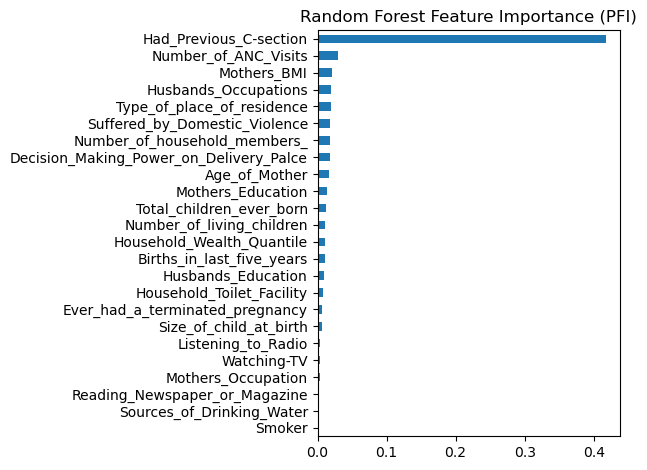

In [47]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

rf_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True)

ax = rf_importances.plot.barh()
ax.set_title("Random Forest Feature Importance (PFI)")
ax.figure.tight_layout()

### TABNET

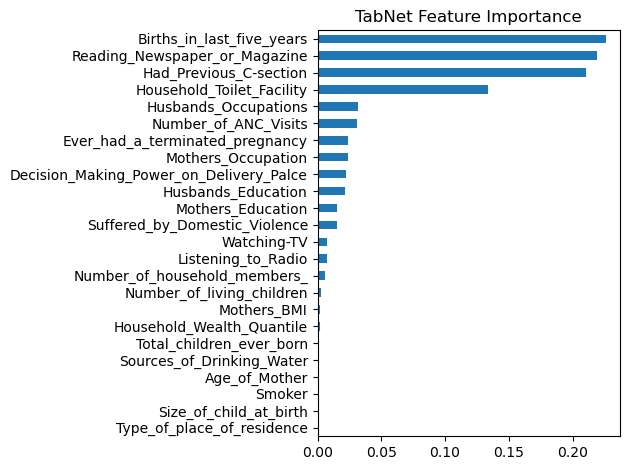

In [48]:
ax = pd.Series(tbn.feature_importances_, index=feature_names).sort_values(ascending=True).plot.barh()
ax.set_title("TabNet Feature Importance")
ax.figure.tight_layout()

### EBM

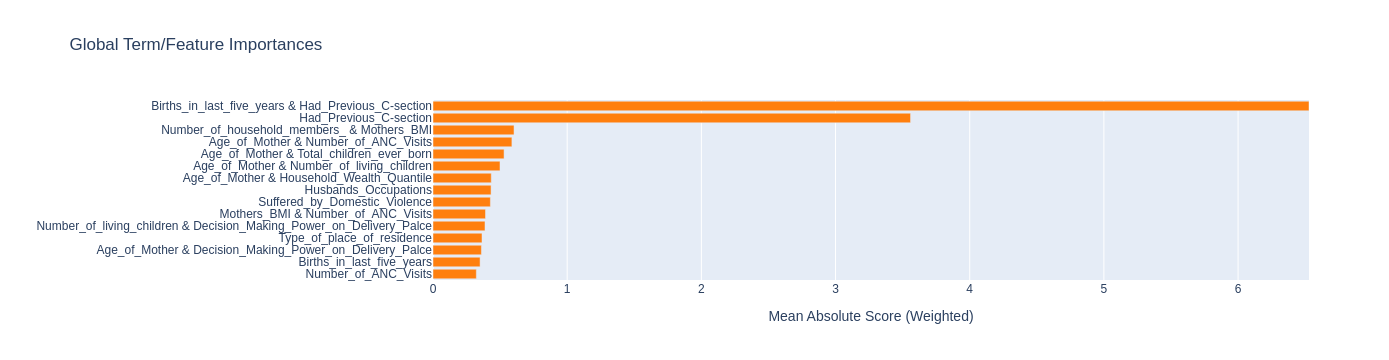

In [49]:
ebm_global = ebm.explain_global()
# show(ebm_global)

# Replace show with the preserve.

# ebm_global = ebm.explain_global(name='EBM')
# show(ebm_global)

# preserve(ebm_global, file_name='output/global-graph.html')
preserve(ebm_global)

### SHAP

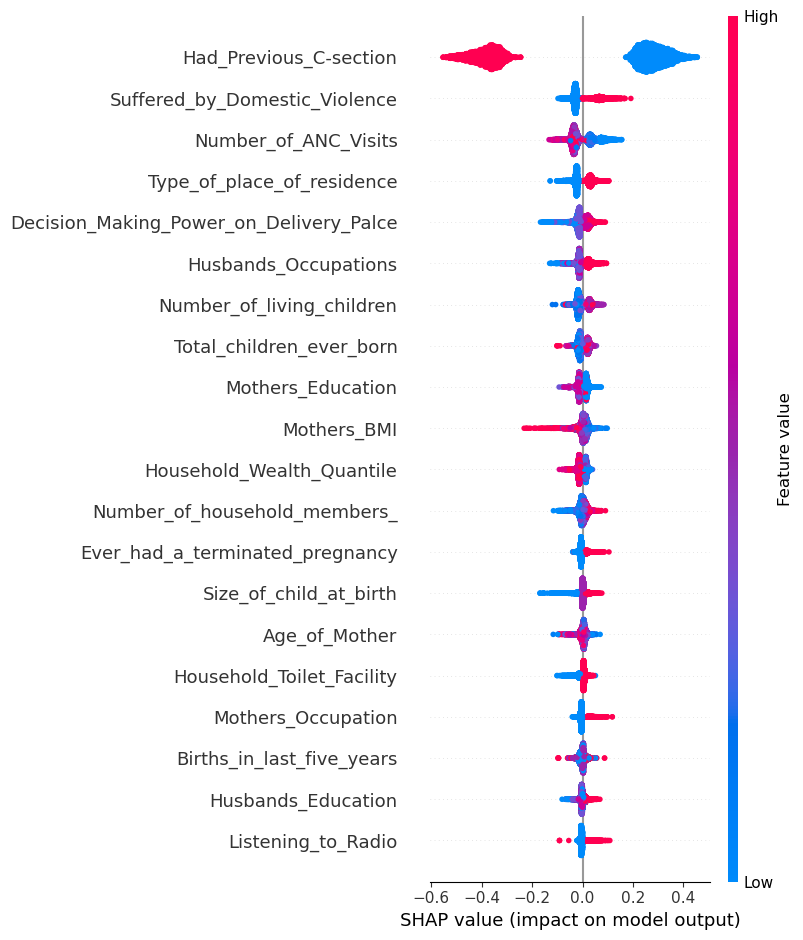

In [50]:
shap.summary_plot(shap_values[:,:,0], x_test)
# shap.summary_plot(shap_values[:,:,0], X_test)

In [51]:
# f.savefig("summary_plot_CS.png", bbox_inches='tight', dpi=600)